In [92]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Estimation with MLE

In [93]:
# beta should be higher than c
n = 500 # number of nodes - 585 similar to c elegans
d = 0  # number of neighbouts to take into account

#sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6
sigma = 4

n_iteration = 30000
warm_up     = 20000 # 10k

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [107]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [108]:
#initial_guess = [0.5,0.5,-10]
#g = graphs[-1]
#est = estimator.MLEGraphModelEstimator(g, p=0)
#a_hat, b_hat, s_hat = est.estimate_parameters_torch(initial_guess=initial_guess, learning_rate=0.001, max_iter=30)

In [109]:
#print(a_hat,b_hat,s_hat)
#print(alpha, beta, sigma)

# Estimation with regression 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


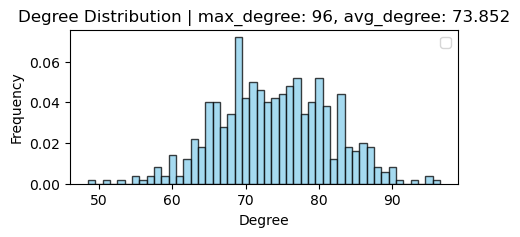

In [110]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
#fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))

fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#fig = ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(7, 5))


#ut.save_graph_html(g, params_dict)

In [111]:
est = estimator.LogitRegEstimator(g , d=0)

In [114]:
features, labels = est.get_features_labels()

In [115]:
result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

print('real: ', -sigma)
print('est: ', params[0])

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:13 AIC:              104127.6193
No. Observations:   124750           BIC:              104156.8215
Df Model:           2                Log-Likelihood:   -52061.    
Df Residuals:       124747           LL-Null:          -52298.    
Converged:          1.0000           LLR p-value:      7.8997e-104
No. Iterations:     19.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1237     0.1100   -37.4736   0.0000   -4.3394   -3.9080
x1         0.0162     0.0010    15.5841   0.0000    0.0141    0.0182
x2         0.0158     0.0010    15.2237   0.0000    0.0138    0.0179

real:  -

In [128]:
summary = result.summary2()
summary.tables[1].loc['const']


Coef.       -4.123700e+00
Std.Err.     1.100428e-01
z           -3.747360e+01
P>|z|       2.480134e-307
[0.025      -4.339380e+00
0.975]      -3.908020e+00
Name: const, dtype: float64

# Multiple times

In [106]:
n_runs = 10
params_list = []
result_list = []
for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect

    est = estimator.LogitRegEstimator(g, d=0)

    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    import pickle
    with open(f'runs/results_array_{i}.pkl', 'wb') as f:
        pickle.dump(result_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.004      
Date:               2024-06-10 18:07 AIC:              103970.6157
No. Observations:   124750           BIC:              103999.8179
Df Model:           2                Log-Likelihood:   -51982.    
Df Residuals:       124747           LL-Null:          -52209.    
Converged:          1.0000           LLR p-value:      4.0712e-99 
No. Iterations:     15.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1237     0.1125   -36.6413   0.0000   -4.3443   -3.9031
x1         0.0163     0.0010    15.5141   0.0000    0.0142    0.0183
x2         0.0158     0.0011    14.5414   0.0000    0.0137    0.0179

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:07 AIC:              104089.4907
No. Observations:   124750           BIC:              104118.6929
Df Model:           2                Log-Likelihood:   -52042.    
Df Residuals:       124747           LL-Null:          -52317.    
Converged:          1.0000           LLR p-value:      1.8105e-120
No. Iterations:     17.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1033     0.1012   -40.5631   0.0000   -4.3016   -3.9050
x1         0.0160     0.0010    16.4136   0.0000    0.0141    0.0179
x2         0.0157     0.0009    16.8905   0.0000    0.0139    0.0175

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:07 AIC:              104170.6865
No. Observations:   124750           BIC:              104199.8887
Df Model:           2                Log-Likelihood:   -52082.    
Df Residuals:       124747           LL-Null:          -52321.    
Converged:          1.0000           LLR p-value:      2.3419e-104
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1256     0.1103   -37.4190   0.0000   -4.3417   -3.9095
x1         0.0158     0.0011    14.7094   0.0000    0.0137    0.0180
x2         0.0162     0.0010    16.1040   0.0000    0.0142    0.0181

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:08 AIC:              104397.0718
No. Observations:   124750           BIC:              104426.2740
Df Model:           2                Log-Likelihood:   -52196.    
Df Residuals:       124747           LL-Null:          -52457.    
Converged:          1.0000           LLR p-value:      2.2205e-114
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1189     0.1047   -39.3442   0.0000   -4.3240   -3.9137
x1         0.0144     0.0009    15.3034   0.0000    0.0126    0.0163
x2         0.0174     0.0010    17.0762   0.0000    0.0154    0.0194

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:08 AIC:              104002.3651
No. Observations:   124750           BIC:              104031.5673
Df Model:           2                Log-Likelihood:   -51998.    
Df Residuals:       124747           LL-Null:          -52246.    
Converged:          1.0000           LLR p-value:      3.2868e-108
No. Iterations:     14.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1192     0.1076   -38.2972   0.0000   -4.3300   -3.9084
x1         0.0158     0.0010    15.3054   0.0000    0.0138    0.0178
x2         0.0162     0.0010    16.1590   0.0000    0.0142    0.0181

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.004      
Date:               2024-06-10 18:08 AIC:              103976.2424
No. Observations:   124750           BIC:              104005.4446
Df Model:           2                Log-Likelihood:   -51985.    
Df Residuals:       124747           LL-Null:          -52211.    
Converged:          1.0000           LLR p-value:      1.1748e-98 
No. Iterations:     14.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1163     0.1125   -36.5995   0.0000   -4.3368   -3.8959
x1         0.0151     0.0011    14.1345   0.0000    0.0130    0.0172
x2         0.0169     0.0011    15.8602   0.0000    0.0148    0.0190

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:08 AIC:              104203.0295
No. Observations:   124750           BIC:              104232.2317
Df Model:           2                Log-Likelihood:   -52099.    
Df Residuals:       124747           LL-Null:          -52354.    
Converged:          1.0000           LLR p-value:      9.1447e-112
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1137     0.1058   -38.8921   0.0000   -4.3210   -3.9064
x1         0.0160     0.0010    15.6030   0.0000    0.0140    0.0180
x2         0.0158     0.0010    16.4058   0.0000    0.0139    0.0177

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:08 AIC:              104004.2460
No. Observations:   124750           BIC:              104033.4482
Df Model:           2                Log-Likelihood:   -51999.    
Df Residuals:       124747           LL-Null:          -52247.    
Converged:          1.0000           LLR p-value:      1.4596e-108
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1307     0.1079   -38.2906   0.0000   -4.3421   -3.9193
x1         0.0153     0.0010    15.3242   0.0000    0.0134    0.0173
x2         0.0168     0.0010    16.1274   0.0000    0.0148    0.0188

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.004      
Date:               2024-06-10 18:08 AIC:              104147.5753
No. Observations:   124750           BIC:              104176.7775
Df Model:           2                Log-Likelihood:   -52071.    
Df Residuals:       124747           LL-Null:          -52300.    
Converged:          1.0000           LLR p-value:      2.9569e-100
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1248     0.1121   -36.7889   0.0000   -4.3446   -3.9051
x1         0.0153     0.0011    14.5405   0.0000    0.0133    0.0174
x2         0.0167     0.0011    15.6955   0.0000    0.0146    0.0188

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.005      
Date:               2024-06-10 18:09 AIC:              104317.6090
No. Observations:   124750           BIC:              104346.8112
Df Model:           2                Log-Likelihood:   -52156.    
Df Residuals:       124747           LL-Null:          -52415.    
Converged:          1.0000           LLR p-value:      1.9201e-113
No. Iterations:     18.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.1201     0.1053   -39.1160   0.0000   -4.3266   -3.9137
x1         0.0170     0.0010    16.8851   0.0000    0.0150    0.0189
x2         0.0149     0.0010    15.2955   0.0000    0.0130    0.0168

